# Scikit Learn Practice

In [1]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable/', width=1200, height=300)

### 1. Getting toy data from sklearn

In [2]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable/datasets/#toy-datasets', width=1200, height=200)

In [3]:
#follow the above instruction, let's try the first data set
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [4]:
#understand the dataset
#the DESCR is a string to describe the data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
#After observing the data, we decide to conduct linear regression analysis on 
#the "target" - house price. Because the price is a continuous value
import numpy as np
X = boston.data
y = boston.target

#in addition to obtaining the data in numpy.ndarray format, we can also 
#create a pandas dataframe to store the data
import pandas as pd 

#Add X to boston_df
boston_df = pd.DataFrame(X)

#the dataframe's column names are from a string list loaded with boston dataset
boston_df.columns = boston.feature_names

#add the target(y) to the last column 
boston_df['Price'] = y

#observe if we obtained the right dataframe
print(boston_df.head(5))
print(boston_df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


### 2. Visualize Data

In [7]:
#import packages for visulization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

[<matplotlib.text.Text at 0xafa93c8>, <matplotlib.text.Text at 0xb0d5518>]

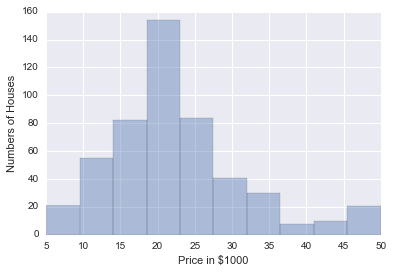

In [10]:
#price distribution: use plt.hist or sns.distplot 
#This time, we try to separate the settings from seaborn plot
#you can simply plot distplot with parameters set in the ()
ax = sns.distplot(y, bins=10, kde=False)
ax.set(xlabel="Price in $1000", ylabel="Numbers of Houses")

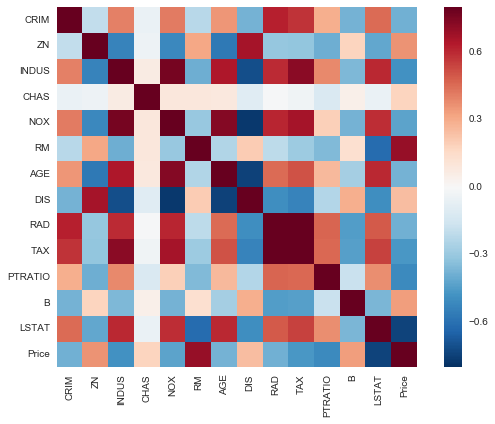

In [12]:
#There are 13 features plus the 'Price" column
#let's observe the correlations among them
#Goolge examples and read seaborn documentation
#we found an example to follow
#http://seaborn.pydata.org/examples/network_correlations.html

#corr() is a Pandas function to calculate correlation among columns
corrmat = boston_df.corr()

# The diagram has a lot information
# Let's change the size of the figure to 8X6(inch X inch)
f, ax = plt.subplots(figsize=(8,6))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

#### We can see that RM, LSTAT, and INDUS have strong relationship to Price

In [13]:
#Look at the correlation numerically
#print(corrmat)
print(corrmat.shape)
corrmat.columns
corrmat['Price'].sort_values()

(14, 14)


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Price      1.000000
Name: Price, dtype: float64

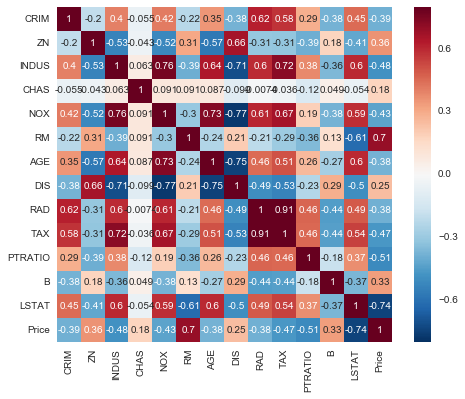

In [14]:
# we can see the numbers via seaborn
# There are other ways to improve this display
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

### 3. Build a Model Using Scikit Learn

In [15]:
#We determine that this is a supervised machine learning problem
#Linear Regression can be a good model
from sklearn import linear_model

In [17]:
#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))


Intercept: 
 36.4911032804
Coefficients: 
 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
R_squared: 
 0.740607742865


### 4. Analyze, Evaluate, and Refine the Model

So far, we used all the features to train the model. Is that necessary or efficient to do so? We already noticed that some features have very low correlation to y. We probably can remove these features first and retrain our model. In addition, some features are highly correlated to each other. We can keep one feature to represent the highly related features. 

There are several techniques for feature selection. Let's explore a very basic one. 

#### 4.1 Train a model with only one feature

In [18]:
#To avoid typing the same states for every training, let's create a simple train_model function 

#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2

In [22]:
#Take a look of column names again
print(boston_df.columns)

#Store the returned R squared 
R_2_array = np.array([])

# for each feature 
for col_name in boston_df.columns:
    # Avoid the last column, because it's y
    if col_name == 'Price':
        continue
    else: 
        #extract the feature column from dataset
        X_feature = boston_df[[col_name]]
        
        #y is still the last column
        target = boston_df[['Price']]
        
        #call the train_model with X, y
        model, R_2 = train_model(X_feature, target)
        
        #print R Squared
        print(col_name, R_2)
        
        #Save the R Squared value to an array
        R_2_array = np.append(R_2_array, R_2)
        

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')
CRIM 0.148866092919
ZN 0.129920844894
INDUS 0.233990030444
CHAS 0.0307161297088
NOX 0.182603042502
RM 0.483525455991
AGE 0.142094744078
DIS 0.0624643721218
RAD 0.145638579912
TAX 0.219525921044
PTRATIO 0.257847318009
B 0.111196118246
LSTAT 0.544146297586


#### 4.2 Sort the features based on R squared values

In [24]:
# find the ordered indexes from R_2_array

#numpy.argsort() sort the indexes based on values
#the sort is in ascending order
#to display it in a descending order we use a smart way - [::-1]
#take your time to think why

#save the sorted indexes in sorted_R_2_index
sorted_R_2_index = np.argsort(R_2_array)[::-1]
print(sorted_R_2_index)

[12  5 10  2  9  4  0  8  6  1 11  7  3]


#### 4.3 Use the most associated features to train the model. Add the features to the model based on their individule R Squared value

In [27]:
#The number of models is the number of features
#in each iteration we add in one new feature
for i in range(len(sorted_R_2_index)):
    
    #the selected_features should be the top i most associated features
    selected_features = []
    
    #take the top 1 to ith features as X
    for j in range(i+1):
        
            #append a new column based on the sorted R value
            #take your time to digist this line
            selected_features.append(boston_df.columns[sorted_R_2_index[j]])
            
    #verify we got the right features
    print(selected_features)
    
    # X
    X_feature = boston_df[selected_features]
    
    # y
    target = boston_df[['Price']]
    
    # train the model
    model, R_2 = train_model(X_feature, target)
    
    #print out R Squared of each model
    print("R2: ", R_2)

['LSTAT']
R2:  0.544146297586
['LSTAT', 'RM']
R2:  0.63856160626
['LSTAT', 'RM', 'PTRATIO']
R2:  0.678624160161
['LSTAT', 'RM', 'PTRATIO', 'INDUS']
R2:  0.678643485576
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
R2:  0.680409774129
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
R2:  0.68102174974
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM']
R2:  0.682600865154
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']
R2:  0.694301688846
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE']
R2:  0.698371350827
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']
R2:  0.69849189519
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B']
R2:  0.706228480533
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS']
R2:  0.735474359356
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS']
R2:  0.740607742865


## Reflection 
 
 It looks like all the features contribute to the improvement of R Squared. Why? 
 There are features improved R more than other features, such as 
 LSTAT, RM, PTRATIO, and DIS. We can set a threshold to remove other features. 
 We can also explore other methods to reduce the number of features. 
 Why do we need to reduce the number of features? 

 Let's try a simple method, called step-wise regression 

In [28]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Stepwise_regression', width=1200, height=300)

### 4.4 Add Adjusted R Squared to the equation

In [29]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2', width=1200, height=300)

In [35]:
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [36]:
# copy 4.3 down here and add Adjusted R_squared to the output

for i in range(len(sorted_R_2_index)):
    
    #the selected_features should be the top i most associated features
    selected_features = []
    
    #take the top 1 to ith features as X
    for j in range(i+1):
        
            #append a new column based on the sorted R value
            #take your time to digest this line
            selected_features.append(boston_df.columns[sorted_R_2_index[j]])
            
    #verify we got the right features
    print(selected_features)
    
    # X
    X_feature = boston_df[selected_features]
    
    # y
    target = boston_df[['Price']]
    
    # train the model
    model, R_2 = train_model(X_feature, target)
    
    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, boston_df.shape[0])
    
    #print the output
    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")
    
    
    

['LSTAT']
R2:  0.544146297586 	 Ajusted R2:  0.543241825955 

['LSTAT', 'RM']
R2:  0.63856160626 	 Ajusted R2:  0.63712447547 

['LSTAT', 'RM', 'PTRATIO']
R2:  0.678624160161 	 Ajusted R2:  0.676703587413 

['LSTAT', 'RM', 'PTRATIO', 'INDUS']
R2:  0.678643485576 	 Ajusted R2:  0.676077764902 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
R2:  0.680409774129 	 Ajusted R2:  0.67721387187 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
R2:  0.68102174974 	 Ajusted R2:  0.677186339917 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM']
R2:  0.682600865154 	 Ajusted R2:  0.678139431532 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']
R2:  0.694301688846 	 Ajusted R2:  0.689380991685 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE']
R2:  0.698371350827 	 Ajusted R2:  0.692898250338 

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']
R2:  0.69849189519 	 Ajusted R2:  0.692400822366 

['LSTAT', 'RM', 'PTRATIO', 'IN

## Conclusions

The adjusted R doesn't help us in this dataset. But this is where we can start evaluating our model. 
Feature selection is a complex problem in machine learning. For future reading, visit Scikit Learn's documentation.

In [37]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable/modules/feature_selection.html', width=1200, height=300)
